In [28]:
### This code add gaussian noise to nn-generate data. In its current version it generates 6 csv files: 3 for tanh, 3 for leaky_ReLU, with
#3 realizations of noise.
### The csv files are inputs for codes that compute traces of BMS and that train (other) neural networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [16]:
function='leaky_ReLU' #tanh, leaky_ReLU
#functions=['tanh', 'leaky_ReLU']
 
realizations=3 #Noise realization. 0,1,2 unless otherwise specified 
sigma=0.1;mean=0;

file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
sample=d.index.stop
print(d.index.stop)

noise = np.random.normal(mean,sigma,sample)

1600


In [17]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)

for realization in range(realizations):
    d.to_csv('../data/'+ 'NN_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.018426,0.0,0.139897,0.158323
1,-3.95,0.018062,0.0,0.008010,0.026072
2,-3.90,0.017699,0.0,0.035427,0.053125
3,-3.85,0.017335,0.0,0.059421,0.076756
4,-3.80,0.016971,0.0,-0.097530,-0.080559
...,...,...,...,...,...
1595,3.75,0.050947,9.0,-0.121508,-0.070561
1596,3.80,0.038210,9.0,0.197292,0.235502
1597,3.85,0.025473,9.0,0.003079,0.028553
1598,3.90,0.012737,9.0,0.199365,0.212101


,x1,y,rep,noise,y_noise
0,-4.00,0.018426,0.0,0.007564,0.025990
1,-3.95,0.018062,0.0,-0.123556,-0.105494
2,-3.90,0.017699,0.0,0.071678,0.089376
3,-3.85,0.017335,0.0,0.093961,0.111296
4,-3.80,0.016971,0.0,-0.078287,-0.061316
...,...,...,...,...,...
155,3.75,0.956572,0.0,0.181802,1.138375
156,3.80,0.967429,0.0,0.031753,0.999182
157,3.85,0.978286,0.0,0.125868,1.104154
158,3.90,0.989143,0.0,-0.040353,0.948790


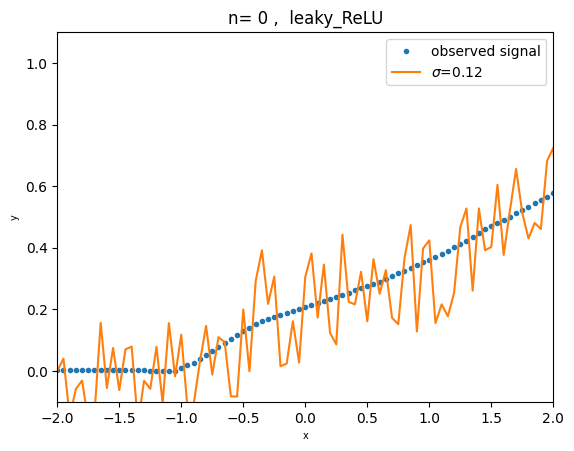

In [9]:
n=0
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed signal')
plt.plot(dn.x1,dn.y_noise,label='$\sigma$=' + str(sigma))
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='nn_' + function + '_sigma_' + str(sigma) + '_n_' + str(n) + '_r_' + str(realization)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)